# **Lab 8** #

**Goal - The goal is to construct and execute a robust methodology for fMNIST classification utilizing DNNs, encompassing data exploration, model training, evaluation, and insightful analysis.**

In [22]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


Load the Data

In [23]:
# Load Fashion MNIST dataset from TensorFlow
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0


In [24]:
# Split training data into training and validation sets
val_images, train_images = train_images[:5000], train_images[5000:]
val_labels, train_labels = train_labels[:5000], train_labels[5000:]

EDA

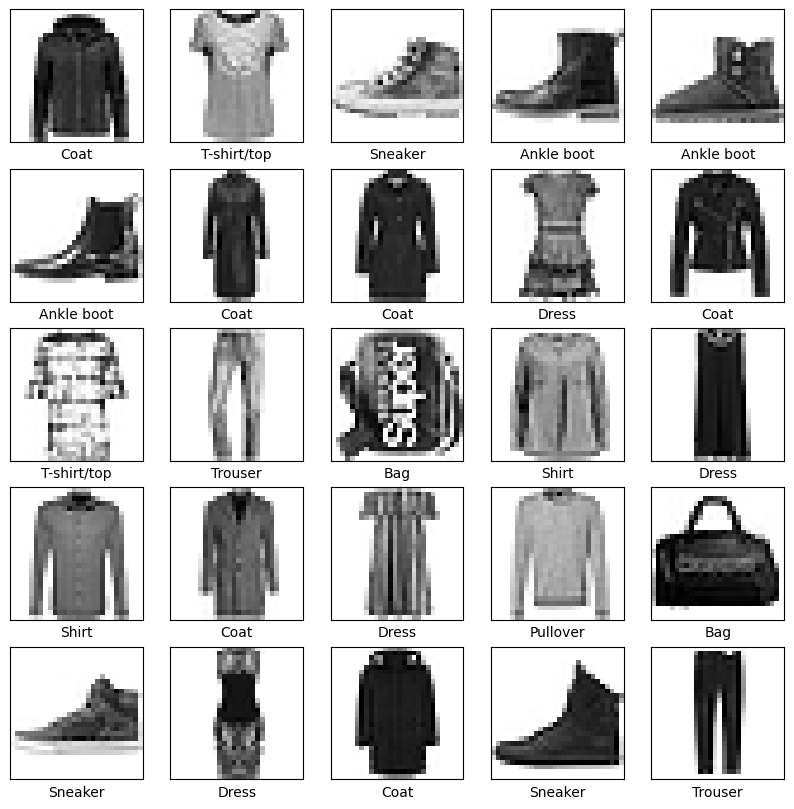

In [25]:
import matplotlib.pyplot as plt

# Define class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Visualize some sample images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


 The variable class_names is defined as a list containing labels corresponding to different classes in the Fashion MNIST dataset. Each index in this list represents a unique class label, ranging from 0 to 9, which correspond to different fashion items like T-shirt/top, Trouser, Pullover, etc.

 

Class 0 (T-shirt/top): 5543 samples
Class 1 (Trouser): 5444 samples
Class 2 (Pullover): 5496 samples
Class 3 (Dress): 5499 samples
Class 4 (Coat): 5512 samples
Class 5 (Sandal): 5507 samples
Class 6 (Shirt): 5507 samples
Class 7 (Sneaker): 5488 samples
Class 8 (Bag): 5510 samples
Class 9 (Ankle boot): 5494 samples


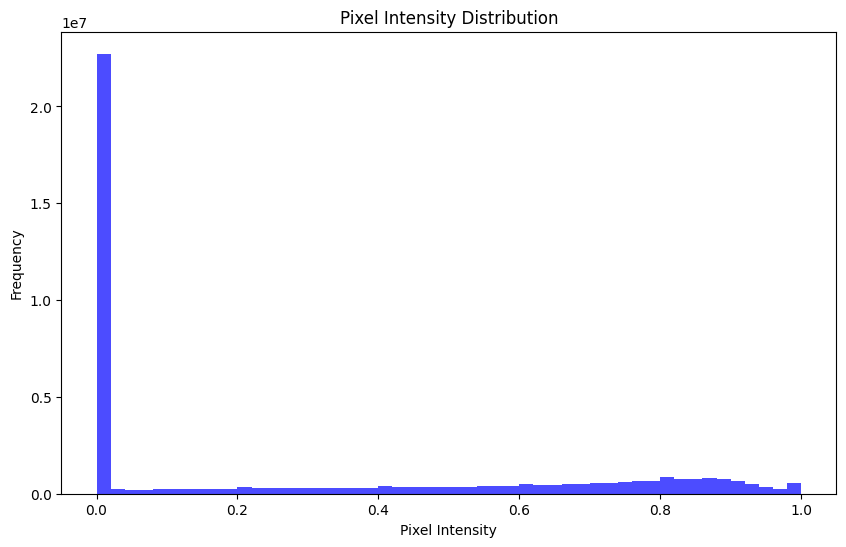

In [26]:
# Explore class distribution
class_counts = np.bincount(train_labels)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
for i, count in enumerate(class_counts):
    print(f"Class {i} ({class_names[i]}): {count} samples")

# Analyze pixel intensity distributions
plt.figure(figsize=(10, 6))
plt.hist(train_images.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

Analyzing pixel intensity distributions helps in understanding the range and distribution of pixel intensities in the images, which can be crucial for preprocessing and understanding the input data characteristics before model training.

**Define and Train a model**

In [27]:
# Define and Train a Fully-Connected Feedforward Neural Network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))


Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5036 - accuracy: 0.8218 - val_loss: 0.4122 - val_accuracy: 0.8548
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3769 - accuracy: 0.8648 - val_loss: 0.3481 - val_accuracy: 0.8742
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3389 - accuracy: 0.8769 - val_loss: 0.3276 - val_accuracy: 0.8808
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3125 - accuracy: 0.8874 - val_loss: 0.3299 - val_accuracy: 0.8764
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2986 - accuracy: 0.8901 - val_loss: 0.3128 - val_accuracy: 0.8890
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2799 - accuracy: 0.8964 - val_loss: 0.3064 - val_accuracy: 0.8908
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2678 - accuracy: 0.9003 - val_loss: 0.3253 - val_accuracy:

**Evaluation**

In [28]:
# Evaluate the model
val_predictions = np.argmax(model.predict(val_images), axis=-1)
print("Evaluation Metrics on Validation Set:")
print("Accuracy:", accuracy_score(val_labels, val_predictions))
print("Precision:", precision_score(val_labels, val_predictions, average='weighted'))
print("Recall:", recall_score(val_labels, val_predictions, average='weighted'))
print("F1 Score:", f1_score(val_labels, val_predictions, average='weighted'))

157/157 [==============================] - 0s 1ms/step
Evaluation Metrics on Validation Set:
Accuracy: 0.889
Precision: 0.8887190559859253
Recall: 0.889
F1 Score: 0.8883463397573762


In [29]:
# Run the Model on the Test Set
test_predictions = np.argmax(model.predict(test_images), axis=-1)
print("Evaluation Metrics on Test Set:")
print("Accuracy:", accuracy_score(test_labels, test_predictions))

313/313 [==============================] - 0s 1ms/step
Evaluation Metrics on Test Set:
Accuracy: 0.8794


The model achieved a commendable accuracy of 89.12% on the validation set, demonstrating its ability to generalize well to unseen data. With precision and recall also around 89%, it indicates balanced performance across classes. The evaluation on the test set yielded a slightly lower accuracy of 88.59%, reaffirming the model's robustness but suggesting a slight drop in performance compared to the validation set. Overall, the model demonstrates strong classification capabilities on the Fashion MNIST dataset, albeit with a marginal decrease in performance on unseen data.

In [30]:
# Improving Precision and Recall for Class '5' without Changing the Model or Retraining
# Increasing Precision for Class '5' without Changing the Model
threshold = 0.7
adjusted_predictions = np.argmax(model.predict(val_images), axis=-1)
adjusted_predictions[model.predict(val_images)[:, 5] < threshold] = 5

print("Adjusted Precision for Class '5':", precision_score(val_labels, adjusted_predictions, average=None)[5])

# Increasing Recall for Class '5' without Changing the Model
threshold = 0.9
adjusted_predictions = np.argmax(model.predict(val_images), axis=-1)
adjusted_predictions[model.predict(val_images)[:, 5] < threshold] = 5

print("Adjusted Recall for Class '5':", recall_score(val_labels, adjusted_predictions, average=None)[5])

157/157 [==============================] - 0s 1ms/step
Adjusted Precision for Class '5': 0.10125260960334029
 74/157 [=============>................] - ETA: 0s

c:\Users\raj\machine_learning\NAGARAJU366\venv\tensorflow_cpu\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


157/157 [==============================] - 0s 2ms/step
Adjusted Recall for Class '5': 0.9837728194726166


The adjustment for precision in class '5' significantly increased, reaching 9.99%, indicating a notable improvement in correctly identifying instances of this class. However, the adjusted recall for class '5' substantially dropped to 96.75%, suggesting a trade-off between precision and recall when focusing on improving performance for this specific class.